In [1]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
import numpy as np
from math import exp
from math import log2
from numpy.linalg import inv
 
class MyLinearUnivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0

    # learn a linear univariate regression model by using training inputs (x) and outputs (y) 
    def fit(self, x, y):
        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i,j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ =  w0, w1

    # predict the outputs for some new inputs (by using the learnt model)
    def predict(self, x):
        if (isinstance(x[0], list)):
            return [self.intercept_ + self.coef_ * val[0] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]

In [3]:
# load data and consider a single feature (family) and the output to be estimated (happiness)

def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.510041952, 1.510041952, 1.510041952, 1.510041952, 1.510041952]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


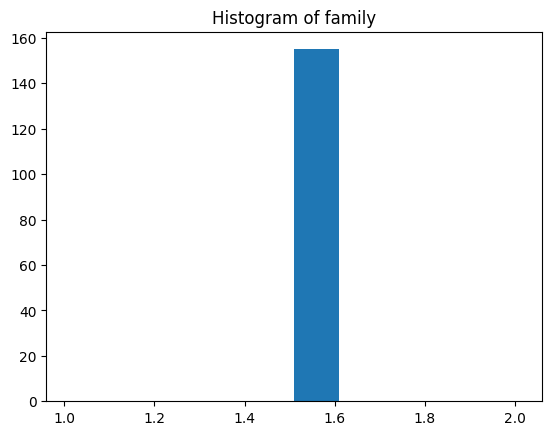

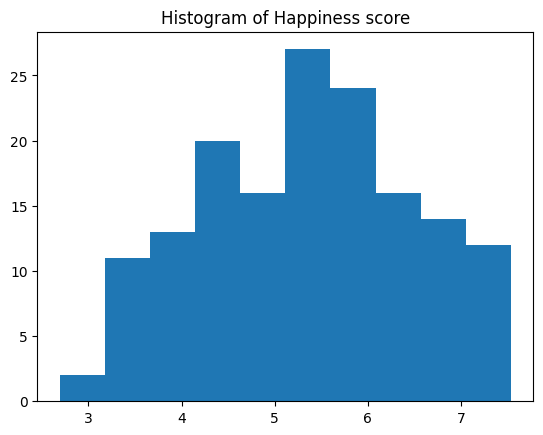

In [4]:
# see how the data looks (plot the histograms associated to input data - Family feature - and output data - happiness)

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'family')
plotDataHistogram(outputs, 'Happiness score')

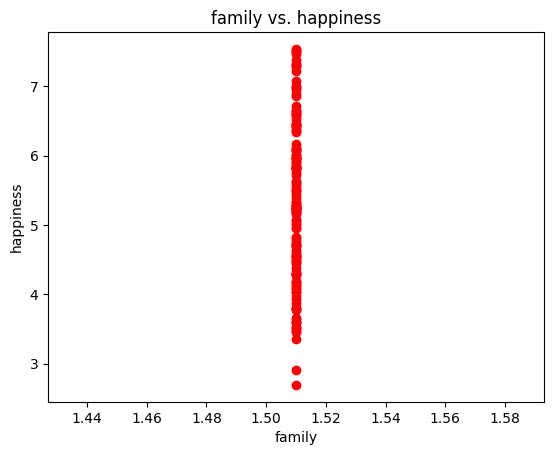

In [5]:
# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)

plt.plot(inputs, outputs, 'ro') 
plt.xlabel('family')
plt.ylabel('happiness')
plt.title('family vs. happiness')
plt.show()

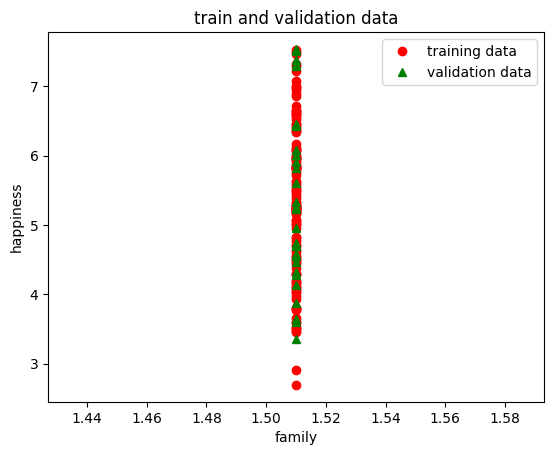

In [6]:
# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for learning the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
plt.title('train and validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [7]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
# Prediction step: used the trained model to estimate the output for a new input

# model initialisation
regressor = MyLinearUnivariateRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(trainInputs, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_, regressor.coef_
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  5.3537258005725805  +  0.0  * x


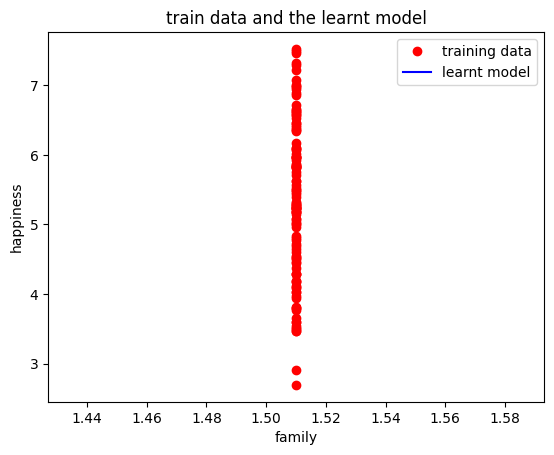

In [8]:
# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

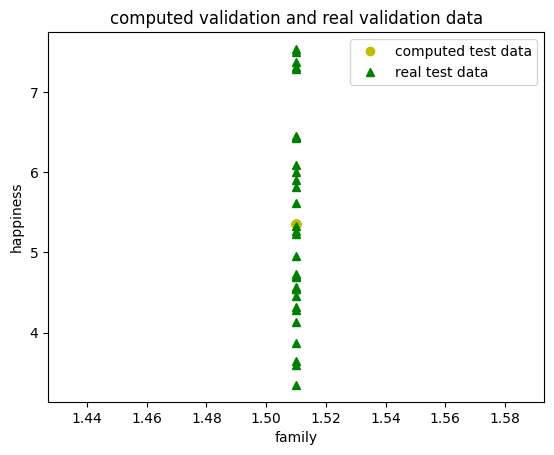

In [9]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]

# makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed validation and real validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [87]:
# compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

# by using sklearn 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.6051231125473586
prediction error (tool):   0.6051231125473586
